# Data Preprocessing for Patient Readmission Prediction

This notebook demonstrates the complete data preprocessing pipeline for patient readmission prediction. We'll load the synthetic patient data, handle missing values, perform feature engineering, encode categorical variables, and split the data into training and testing sets.


## Cell 1: Imports

Import necessary libraries for data manipulation and preprocessing.


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


## Cell 2: Load Data

Load the synthetic patient data from CSV file and display basic information about the dataset.


First 5 rows of the dataset:
   age  gender admission_type  length_of_stay  num_lab_procedures  \
0   69    Male       Elective               2                  15   
1   32  Female      Emergency               4                  22   
2   89  Female      Emergency               8                  27   
3   78    Male      Emergency               1                  27   
4   38    Male      Emergency               8                  17   

   num_medications diagnosis_code  readmitted  
0               11            N18           1  
1               12            M79           0  
2               18            I10           1  
3               15            E11           0  
4                9            F32           0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 1000 non-null   int6

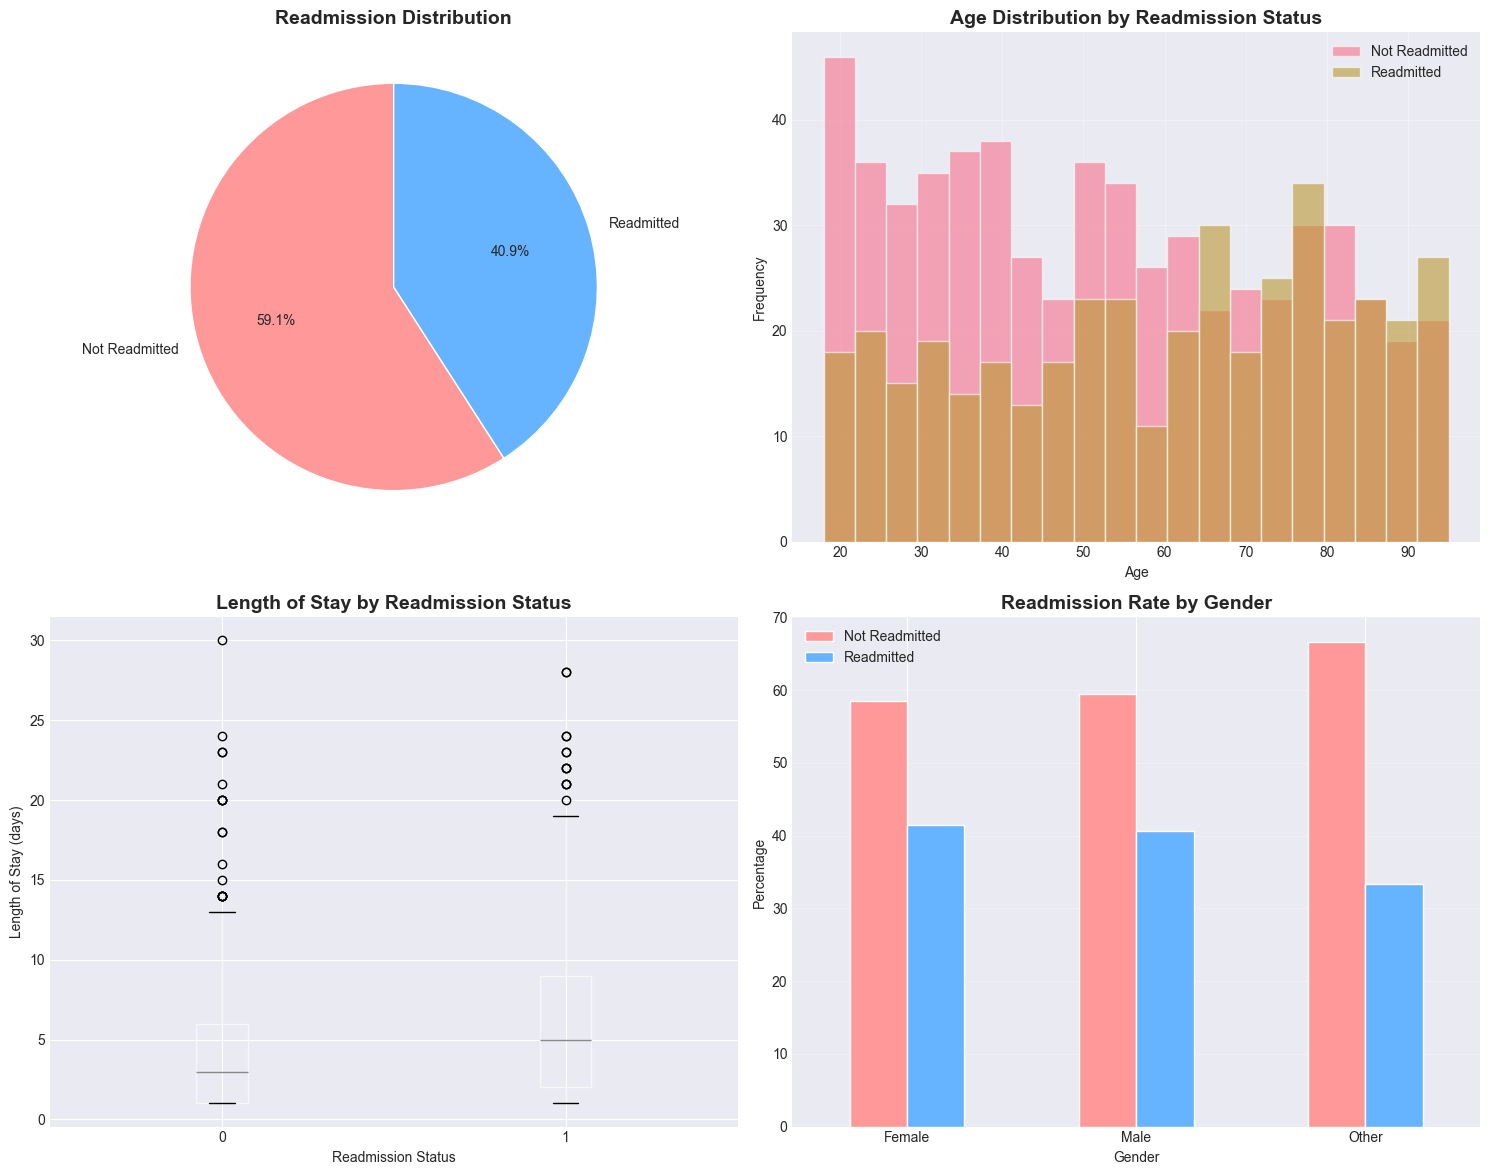

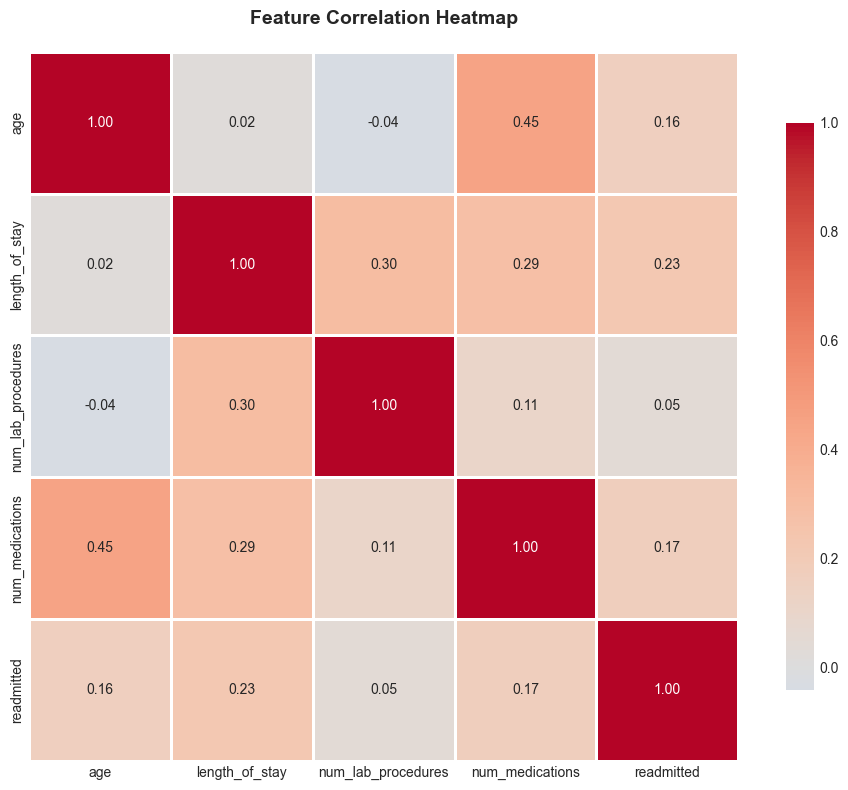

In [8]:
# Load the synthetic patient data
df = pd.read_csv('../data/synthetic_patient_data.csv')

# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

print("\n" + "="*50)
print("Dataset Information:")
print("="*50)
df.info()

print("\n" + "="*50)
print("Dataset Shape:")
print("="*50)
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n" + "="*50)
print("Basic Statistics:")
print("="*50)
print(df.describe())

print("\n" + "="*50)
print("Target Variable Distribution:")
print("="*50)
print(df['readmitted'].value_counts())
print(f"\nReadmission rate: {df['readmitted'].mean():.2%}")

# Data Exploration Visualizations
print("\n" + "="*50)
print("DATA EXPLORATION VISUALIZATIONS")
print("="*50)

# Visualize target variable distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Target variable distribution (pie chart)
ax1 = axes[0, 0]
readmission_counts = df['readmitted'].value_counts()
ax1.pie(readmission_counts.values, labels=['Not Readmitted', 'Readmitted'], 
        autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
ax1.set_title('Readmission Distribution', fontsize=14, fontweight='bold')

# 2. Age distribution by readmission status
ax2 = axes[0, 1]
for status in [0, 1]:
    subset = df[df['readmitted'] == status]
    ax2.hist(subset['age'], bins=20, alpha=0.6, 
             label='Readmitted' if status == 1 else 'Not Readmitted')
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')
ax2.set_title('Age Distribution by Readmission Status', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Length of stay distribution
ax3 = axes[1, 0]
df.boxplot(column='length_of_stay', by='readmitted', ax=ax3)
ax3.set_xlabel('Readmission Status')
ax3.set_ylabel('Length of Stay (days)')
ax3.set_title('Length of Stay by Readmission Status', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title

# 4. Categorical variables analysis
ax4 = axes[1, 1]
gender_admission = pd.crosstab(df['gender'], df['readmitted'], normalize='index') * 100
gender_admission.plot(kind='bar', ax=ax4, color=['#ff9999', '#66b3ff'])
ax4.set_xlabel('Gender')
ax4.set_ylabel('Percentage')
ax4.set_title('Readmission Rate by Gender', fontsize=14, fontweight='bold')
ax4.legend(['Not Readmitted', 'Readmitted'])
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_df = df[['age', 'length_of_stay', 'num_lab_procedures', 'num_medications', 'readmitted']]
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


## Cell 3: Handle Missing Data

Real-world datasets often contain missing values. In this step, we'll:
1. Introduce some random missing values to simulate real-world data
2. Handle missing values by imputing numerical columns with the mean and categorical columns with the mode

**Why this is important:** Missing data can cause errors during model training. Proper imputation ensures the model can learn from all available data.


Missing values introduced:
age                   50
gender                30
admission_type        30
length_of_stay        50
num_lab_procedures    50
num_medications       50
diagnosis_code        30
readmitted             0
dtype: int64

Handling Missing Values:
Imputed age with mean: 55.57
Imputed length_of_stay with mean: 5.16
Imputed num_lab_procedures with mean: 21.11
Imputed num_medications with mean: 12.01
Imputed gender with mode: Female
Imputed admission_type with mode: Emergency
Imputed diagnosis_code with mode: I10

Missing values after imputation:
0
✓ All missing values have been handled!


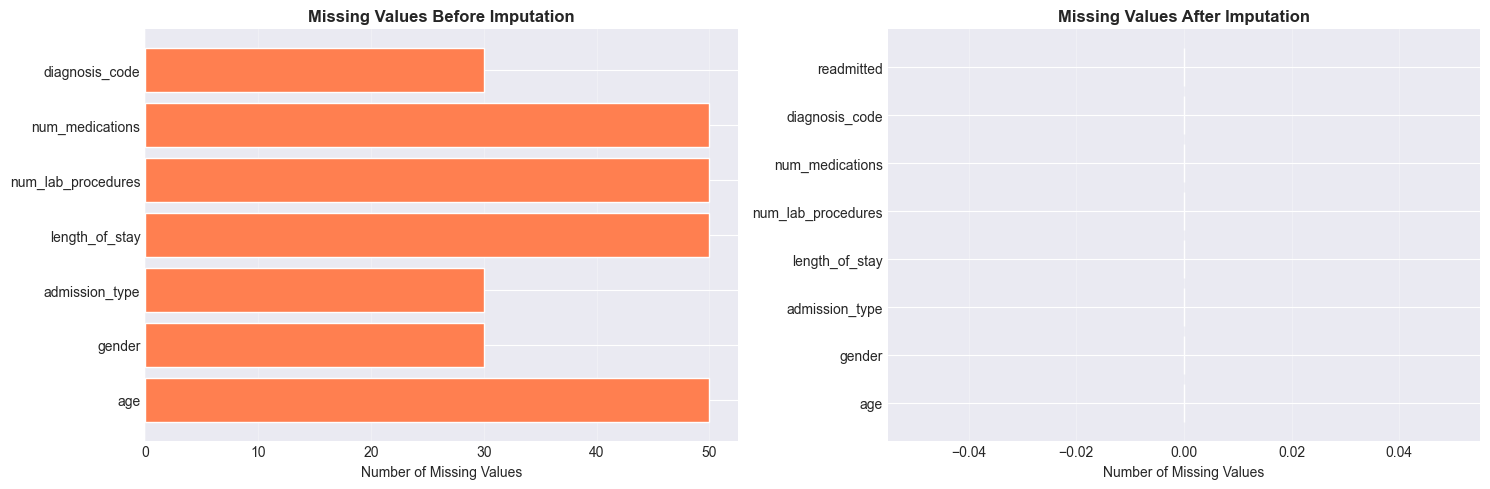

In [9]:
# Introduce random missing values to simulate real-world data
# This is for demonstration purposes - in practice, missing values would already exist
np.random.seed(42)

# Introduce 5% missing values in numerical columns
numerical_cols = ['age', 'length_of_stay', 'num_lab_procedures', 'num_medications']
for col in numerical_cols:
    missing_indices = np.random.choice(df.index, size=int(len(df) * 0.05), replace=False)
    df.loc[missing_indices, col] = np.nan

# Introduce 3% missing values in categorical columns
categorical_cols = ['gender', 'admission_type', 'diagnosis_code']
for col in categorical_cols:
    missing_indices = np.random.choice(df.index, size=int(len(df) * 0.03), replace=False)
    df.loc[missing_indices, col] = np.nan

print("Missing values introduced:")
missing_before = df.isnull().sum()
print(missing_before)

# Visualize missing values before imputation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Before imputation
ax1 = axes[0]
missing_counts = missing_before[missing_before > 0]
ax1.barh(missing_counts.index, missing_counts.values, color='coral')
ax1.set_xlabel('Number of Missing Values')
ax1.set_title('Missing Values Before Imputation', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

print("\n" + "="*50)
print("Handling Missing Values:")
print("="*50)

# Impute numerical columns with mean
for col in numerical_cols:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)
    print(f"Imputed {col} with mean: {mean_value:.2f}")

# Impute categorical columns with mode
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
    print(f"Imputed {col} with mode: {mode_value}")

print("\n" + "="*50)
print("Missing values after imputation:")
print("="*50)
missing_after = df.isnull().sum()
print(missing_after.sum())
print("✓ All missing values have been handled!")

# After imputation (should be all zeros)
ax2 = axes[1]
ax2.barh(missing_after.index, missing_after.values, color='lightgreen')
ax2.set_xlabel('Number of Missing Values')
ax2.set_title('Missing Values After Imputation', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


Comorbidity score feature created!

Comorbidity Score Statistics:
count    1000.000000
mean        2.100500
std         1.319153
min         0.000000
25%         1.087500
50%         1.900000
75%         3.120000
max         5.000000
Name: comorbidity_score, dtype: float64

Correlation with readmission:
Correlation: 0.297

Comorbidity Score by Readmission Status:
            count      mean       std  min   25%   50%   75%  max
readmitted                                                       
0           591.0  1.774552  1.191961  0.0  0.87  1.53  2.51  5.0
1           409.0  2.571491  1.352783  0.0  1.51  2.45  3.67  5.0


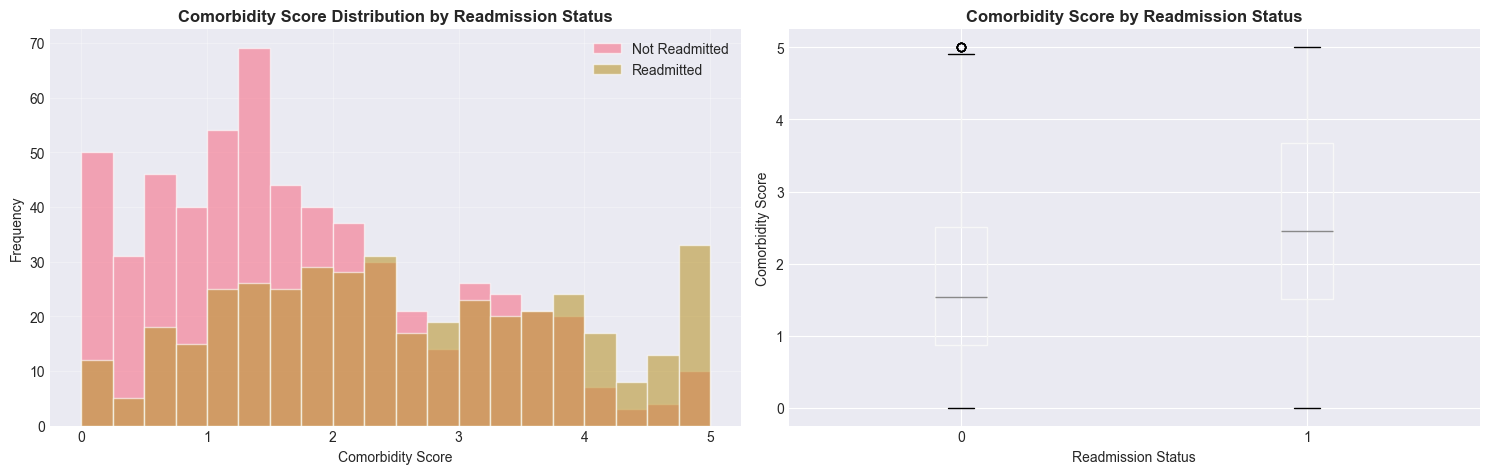

In [10]:
# Create comorbidity_score feature
# This score combines multiple factors that indicate patient complexity
# Higher scores indicate higher risk of readmission

np.random.seed(42)

comorbidity_scores = []

for idx, row in df.iterrows():
    score = 0
    
    # Age factor (older patients have higher scores)
    if row['age'] > 75:
        score += 2
    elif row['age'] > 65:
        score += 1
    elif row['age'] > 50:
        score += 0.5
    
    # Length of stay factor (longer stays indicate complexity)
    if row['length_of_stay'] > 14:
        score += 2
    elif row['length_of_stay'] > 7:
        score += 1
    
    # Medication count factor (more medications = more conditions)
    if row['num_medications'] > 15:
        score += 1.5
    elif row['num_medications'] > 10:
        score += 0.5
    
    # Diagnosis code factor (certain conditions are more complex)
    high_complexity_codes = ['I10', 'E11', 'J44', 'N18']
    if row['diagnosis_code'] in high_complexity_codes:
        score += 1
    
    # Add some randomness to make it more realistic
    score += np.random.uniform(-0.5, 0.5)
    
    # Ensure score is between 0 and 5
    score = max(0, min(5, score))
    comorbidity_scores.append(round(score, 2))

# Add the new feature to the dataframe
df['comorbidity_score'] = comorbidity_scores

print("Comorbidity score feature created!")
print(f"\nComorbidity Score Statistics:")
print(df['comorbidity_score'].describe())

print(f"\nCorrelation with readmission:")
correlation = df['comorbidity_score'].corr(df['readmitted'])
print(f"Correlation: {correlation:.3f}")

# Show distribution by readmission status
print(f"\nComorbidity Score by Readmission Status:")
print(df.groupby('readmitted')['comorbidity_score'].describe())

# Visualize comorbidity score distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Comorbidity score distribution by readmission status
ax1 = axes[0]
for status in [0, 1]:
    subset = df[df['readmitted'] == status]
    ax1.hist(subset['comorbidity_score'], bins=20, alpha=0.6, 
             label='Readmitted' if status == 1 else 'Not Readmitted')
ax1.set_xlabel('Comorbidity Score')
ax1.set_ylabel('Frequency')
ax1.set_title('Comorbidity Score Distribution by Readmission Status', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Box plot of comorbidity score
ax2 = axes[1]
df.boxplot(column='comorbidity_score', by='readmitted', ax=ax2)
ax2.set_xlabel('Readmission Status')
ax2.set_ylabel('Comorbidity Score')
ax2.set_title('Comorbidity Score by Readmission Status', fontsize=12, fontweight='bold')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()


## Cell 5: Encoding Categorical Variables

Machine learning models require numerical inputs. We need to convert categorical variables (gender, admission_type, diagnosis_code) into numerical format using one-hot encoding.

**Why this is necessary:** Most ML algorithms cannot directly process categorical text data. One-hot encoding creates binary columns for each category, making the data suitable for machine learning.


In [11]:
# Identify categorical columns
categorical_columns = ['gender', 'admission_type', 'diagnosis_code']

print("Original categorical columns:")
print(categorical_columns)

print(f"\nUnique values in each categorical column:")
for col in categorical_columns:
    print(f"  {col}: {df[col].unique()}")

# Use pandas get_dummies for one-hot encoding
# This creates binary columns for each category
df_encoded = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns, drop_first=False)

print(f"\n" + "="*50)
print("After One-Hot Encoding:")
print("="*50)
print(f"Original columns: {len(df.columns)}")
print(f"Encoded columns: {len(df_encoded.columns)}")

print(f"\nNew columns created:")
encoded_cols = [col for col in df_encoded.columns if any(col.startswith(cat) for cat in categorical_columns)]
print(encoded_cols)

print(f"\nFirst few rows of encoded data:")
print(df_encoded.head())

# Update df to the encoded version
df = df_encoded.copy()


Original categorical columns:
['gender', 'admission_type', 'diagnosis_code']

Unique values in each categorical column:
  gender: ['Male' 'Female' 'Other']
  admission_type: ['Elective' 'Emergency' 'Urgent']
  diagnosis_code: ['N18' 'M79' 'I10' 'E11' 'J44' 'F32' 'K21' 'I50']

After One-Hot Encoding:
Original columns: 9
Encoded columns: 20

New columns created:
['gender_Female', 'gender_Male', 'gender_Other', 'admission_type_Elective', 'admission_type_Emergency', 'admission_type_Urgent', 'diagnosis_code_E11', 'diagnosis_code_F32', 'diagnosis_code_I10', 'diagnosis_code_I50', 'diagnosis_code_J44', 'diagnosis_code_K21', 'diagnosis_code_M79', 'diagnosis_code_N18']

First few rows of encoded data:
    age  length_of_stay  num_lab_procedures  num_medications  readmitted  \
0  69.0             2.0                15.0             11.0           1   
1  32.0             4.0                22.0             12.0           0   
2  89.0             8.0                27.0             18.0           

## Cell 6: Data Splitting

Split the preprocessed data into features (X) and target variable (y), then split into training and testing sets using an 80/20 split.

**Why this is important:** We need to evaluate the model on unseen data. The training set is used to train the model, while the test set is used to evaluate its performance on new data.


In [12]:
# Separate features (X) and target variable (y)
# Target variable is 'readmitted'
X = df.drop('readmitted', axis=1)
y = df['readmitted']

print("Feature columns (X):")
print(X.columns.tolist())
print(f"\nNumber of features: {X.shape[1]}")

print(f"\nTarget variable (y):")
print(f"Shape: {y.shape}")
print(f"Value counts:\n{y.value_counts()}")

# Split into training and testing sets
# 80% for training, 20% for testing
# random_state=42 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Ensures both sets have similar readmission rates
)

print(f"\n" + "="*50)
print("Data Split Summary:")
print("="*50)
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")

print(f"\nTraining set readmission rate: {y_train.mean():.2%}")
print(f"Test set readmission rate: {y_test.mean():.2%}")

print("\n✓ Data preprocessing complete!")
print("✓ Data is ready for model training!")



Feature columns (X):
['age', 'length_of_stay', 'num_lab_procedures', 'num_medications', 'comorbidity_score', 'gender_Female', 'gender_Male', 'gender_Other', 'admission_type_Elective', 'admission_type_Emergency', 'admission_type_Urgent', 'diagnosis_code_E11', 'diagnosis_code_F32', 'diagnosis_code_I10', 'diagnosis_code_I50', 'diagnosis_code_J44', 'diagnosis_code_K21', 'diagnosis_code_M79', 'diagnosis_code_N18']

Number of features: 19

Target variable (y):
Shape: (1000,)
Value counts:
readmitted
0    591
1    409
Name: count, dtype: int64

Data Split Summary:
Training set size: 800 samples (80.0%)
Test set size: 200 samples (20.0%)

Training set readmission rate: 40.88%
Test set readmission rate: 41.00%

✓ Data preprocessing complete!
✓ Data is ready for model training!
